<a href="https://colab.research.google.com/github/GlitzOfStenz/PRODIGY_DS_03/blob/main/PRODIGY_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [ ]:
df.shape

(11162, 17)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
df.dtypes.value_counts()

,count
object,10
int64,7


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
cat_cols=df.select_dtypes(include='object').columns
print(cat_cols)
con_cols=df.select_dtypes(exclude='object').columns
print(con_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


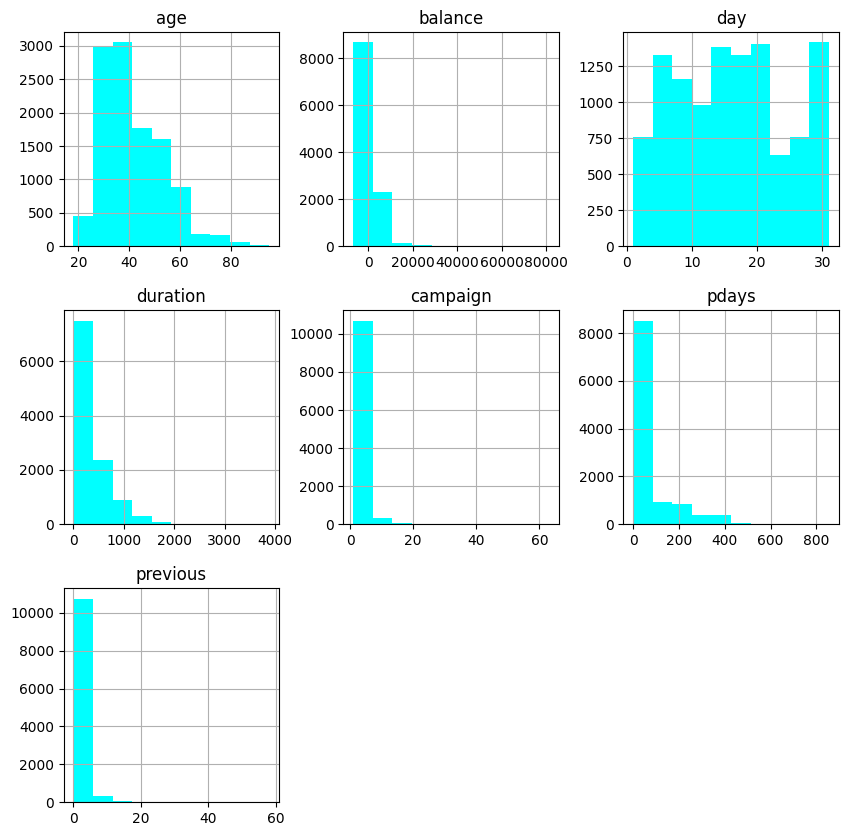

In [ ]:
df.hist(figsize=(10,10),color='#00FFFF')
plt.show()

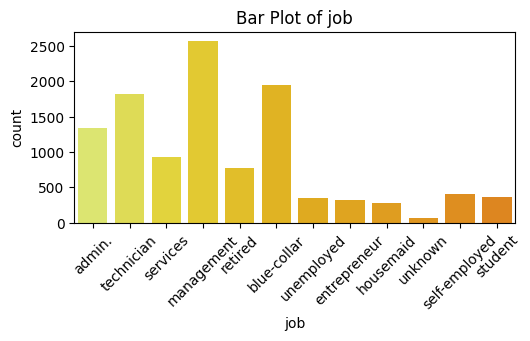

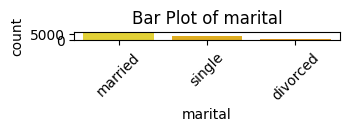

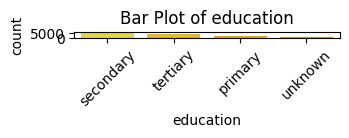

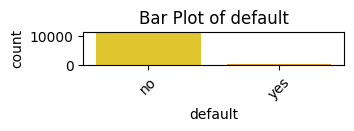

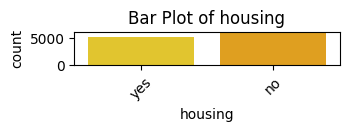

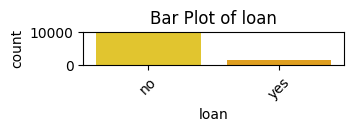

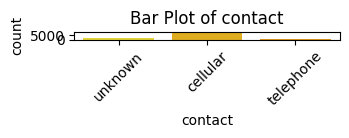

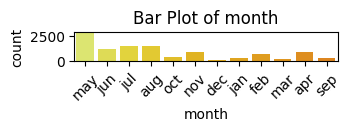

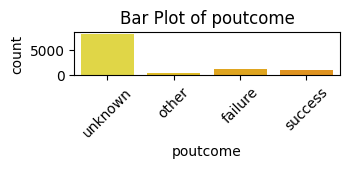

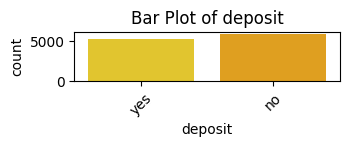

In [ ]:
num_plots=len(cat_cols)
num_rows=(num_plots+1)//2
num_cols=2
plt.figure(figsize=(10,15))
for i,feature in enumerate(cat_cols,1):
  plt.subplot(num_rows,num_cols,i)
  sns.countplot(x=feature,data=df,palette='Wistia')
  plt.title(f'Bar Plot of {feature}')
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()


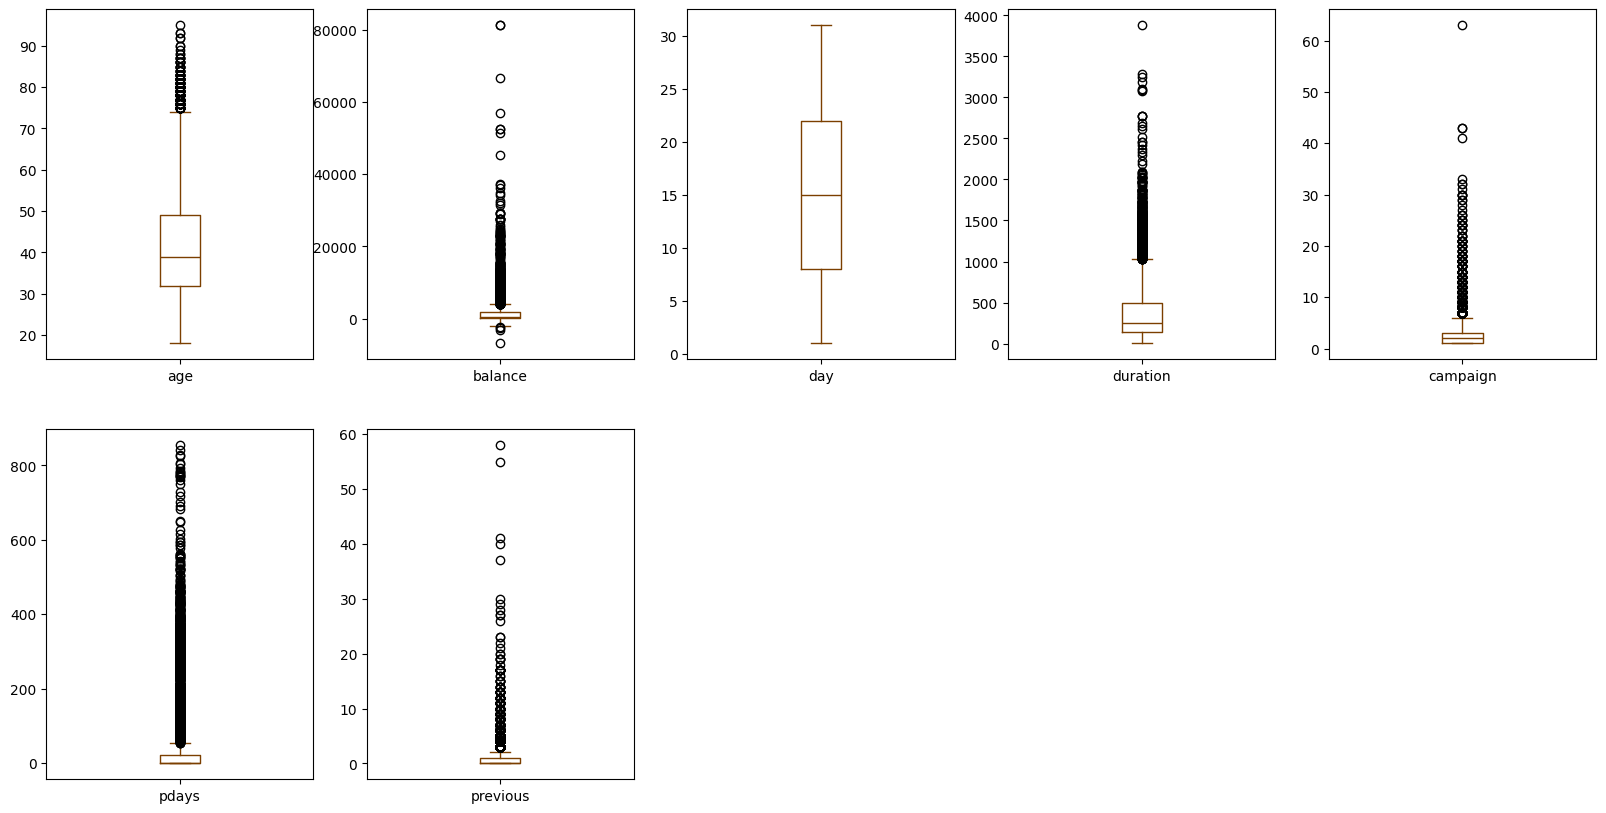

In [ ]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10),color='#7b3f00')
plt.show()

In [ ]:
column=df[['age','campaign','duration'] ]
q1=np.percentile(column,25)
q3=np.percentile(column,75)
iqr=q3-q1
low_bound=q1-1.5*iqr
up_bound=q3+1.5*iqr
df[['age','campaign','duration']]=column[(column>low_bound)&(column<up_bound)]

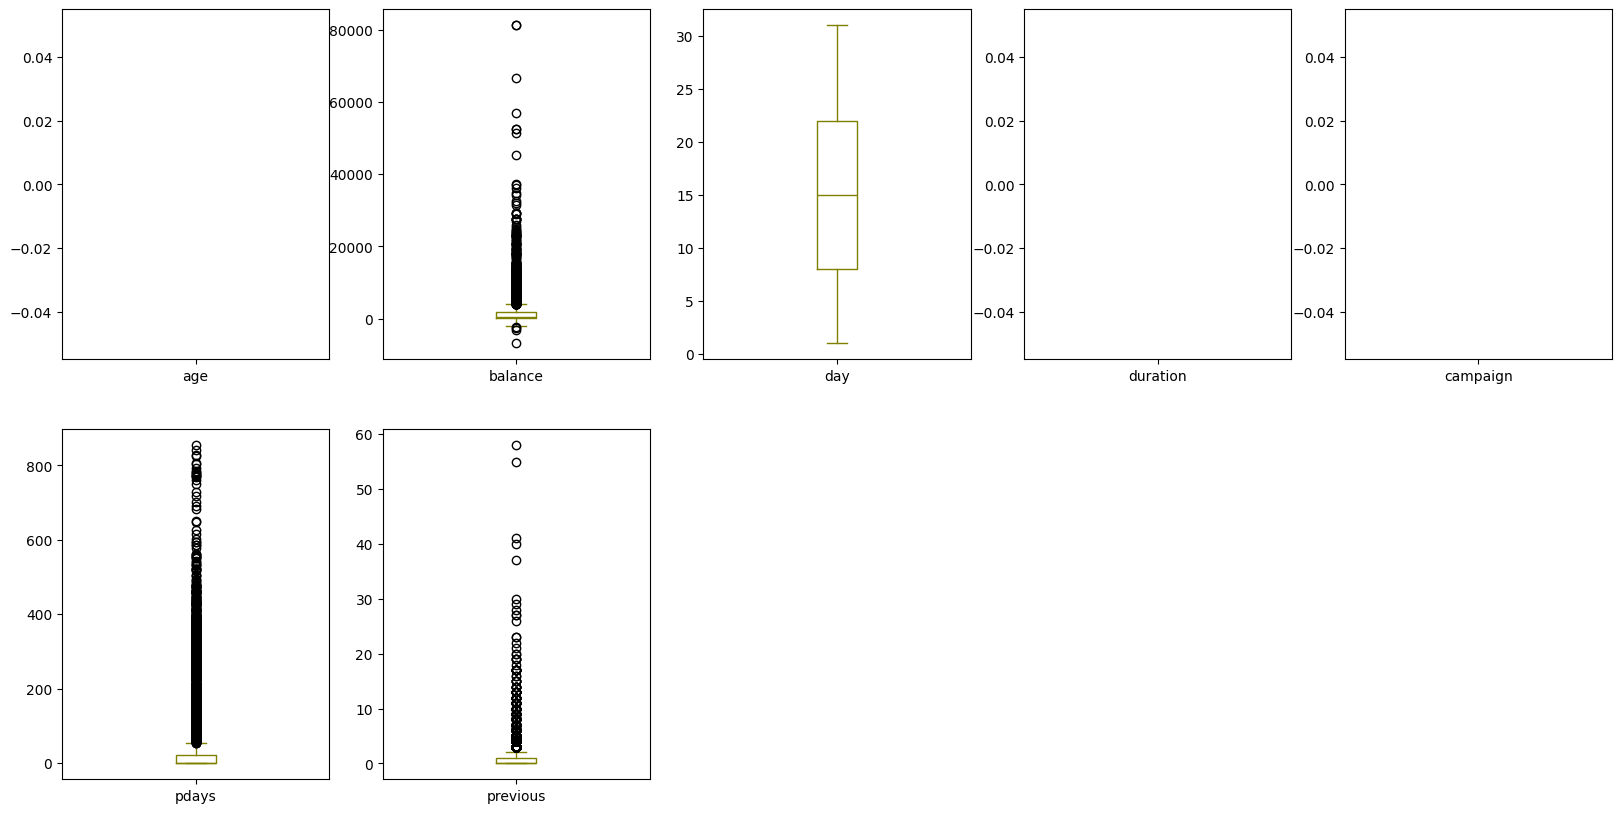

In [ ]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10),color='#808000')
plt.show()

          age   balance       day  duration  campaign     pdays  previous
age       NaN       NaN       NaN       NaN       NaN       NaN       NaN
balance   NaN  1.000000  0.010467       NaN       NaN  0.017411  0.030805
day       NaN  0.010467  1.000000       NaN       NaN -0.077232 -0.058981
duration  NaN       NaN       NaN       NaN       NaN       NaN       NaN
campaign  NaN       NaN       NaN       NaN       NaN       NaN       NaN
pdays     NaN  0.017411 -0.077232       NaN       NaN  1.000000  0.507272
previous  NaN  0.030805 -0.058981       NaN       NaN  0.507272  1.000000


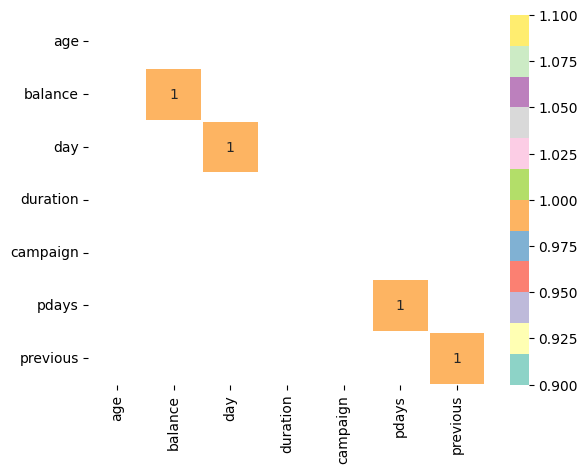

In [ ]:
numeric_df=df.drop(columns=cat_cols)
corr=numeric_df.corr()
print(corr)
corr=corr[abs(corr)>=0.90]
sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

In [ ]:
high_corr_cols=['age','balance','day']

In [ ]:
df1=df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df1.drop(high_corr_cols,inplace=True,axis=1)
df1.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'deposit'],
      dtype='object')

In [ ]:
df1.shape

(11162, 14)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df_encoded=df1.apply(lb.fit_transform)
df_encoded

,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,deposit
0,0,1,1,0,1,0,2,8,1021,0,0,0,3,1
1,0,1,1,0,0,0,2,8,1283,0,0,0,3,1
2,9,1,1,0,1,0,2,8,1246,0,0,0,3,1
3,7,1,1,0,1,0,2,8,577,0,0,0,3,1
4,0,1,2,0,0,0,2,8,671,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,2,0,0,1,0,0,0,255,0,0,0,3,0
11158,7,1,1,0,0,0,2,6,81,3,0,0,3,0
11159,9,2,1,0,0,0,0,1,154,1,0,0,3,0
11160,9,1,1,0,0,1,0,8,7,1,155,5,0,0


In [ ]:
df_encoded['deposit'].value_counts()

,count
deposit,
0,5873
1,5289


In [ ]:
x=df_encoded.drop('deposit',axis=1)
y=df_encoded['deposit']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(11162, 13)
(11162,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8371, 13)
(2791, 13)
(8371,)
(2791,)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def eval_model(y_test,y_pred):
  print('Accuracy Score:',accuracy_score(y_test,y_pred))
  print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
  print('Classification Report:\n',classification_report(y_test,y_pred))
def mscore(model):
  train_score=model.score(x_train,y_train)
  test_score=model.score(x_test,y_test)
  print('Training Score:',train_score)
  print('Testing Score:',test_score)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [ ]:
mscore(dt)

Training Score: 0.8151953171664078
Testing Score: 0.8043711931207452


In [ ]:
ypred_dt=dt.predict(x_test)
print(ypred_dt)

[0 0 0 ... 0 1 0]


In [ ]:
eval_model(y_test,ypred_dt)

Accuracy Score: 0.8043711931207452
Confusion Matrix:
 [[1095  362]
 [ 184 1150]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80      1457
           1       0.76      0.86      0.81      1334

    accuracy                           0.80      2791
   macro avg       0.81      0.81      0.80      2791
weighted avg       0.81      0.80      0.80      2791



In [ ]:
from sklearn.tree import plot_tree
cn=['no','yes']
fn=x_train.columns
print(fn)
print(cn)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')
['no', 'yes']


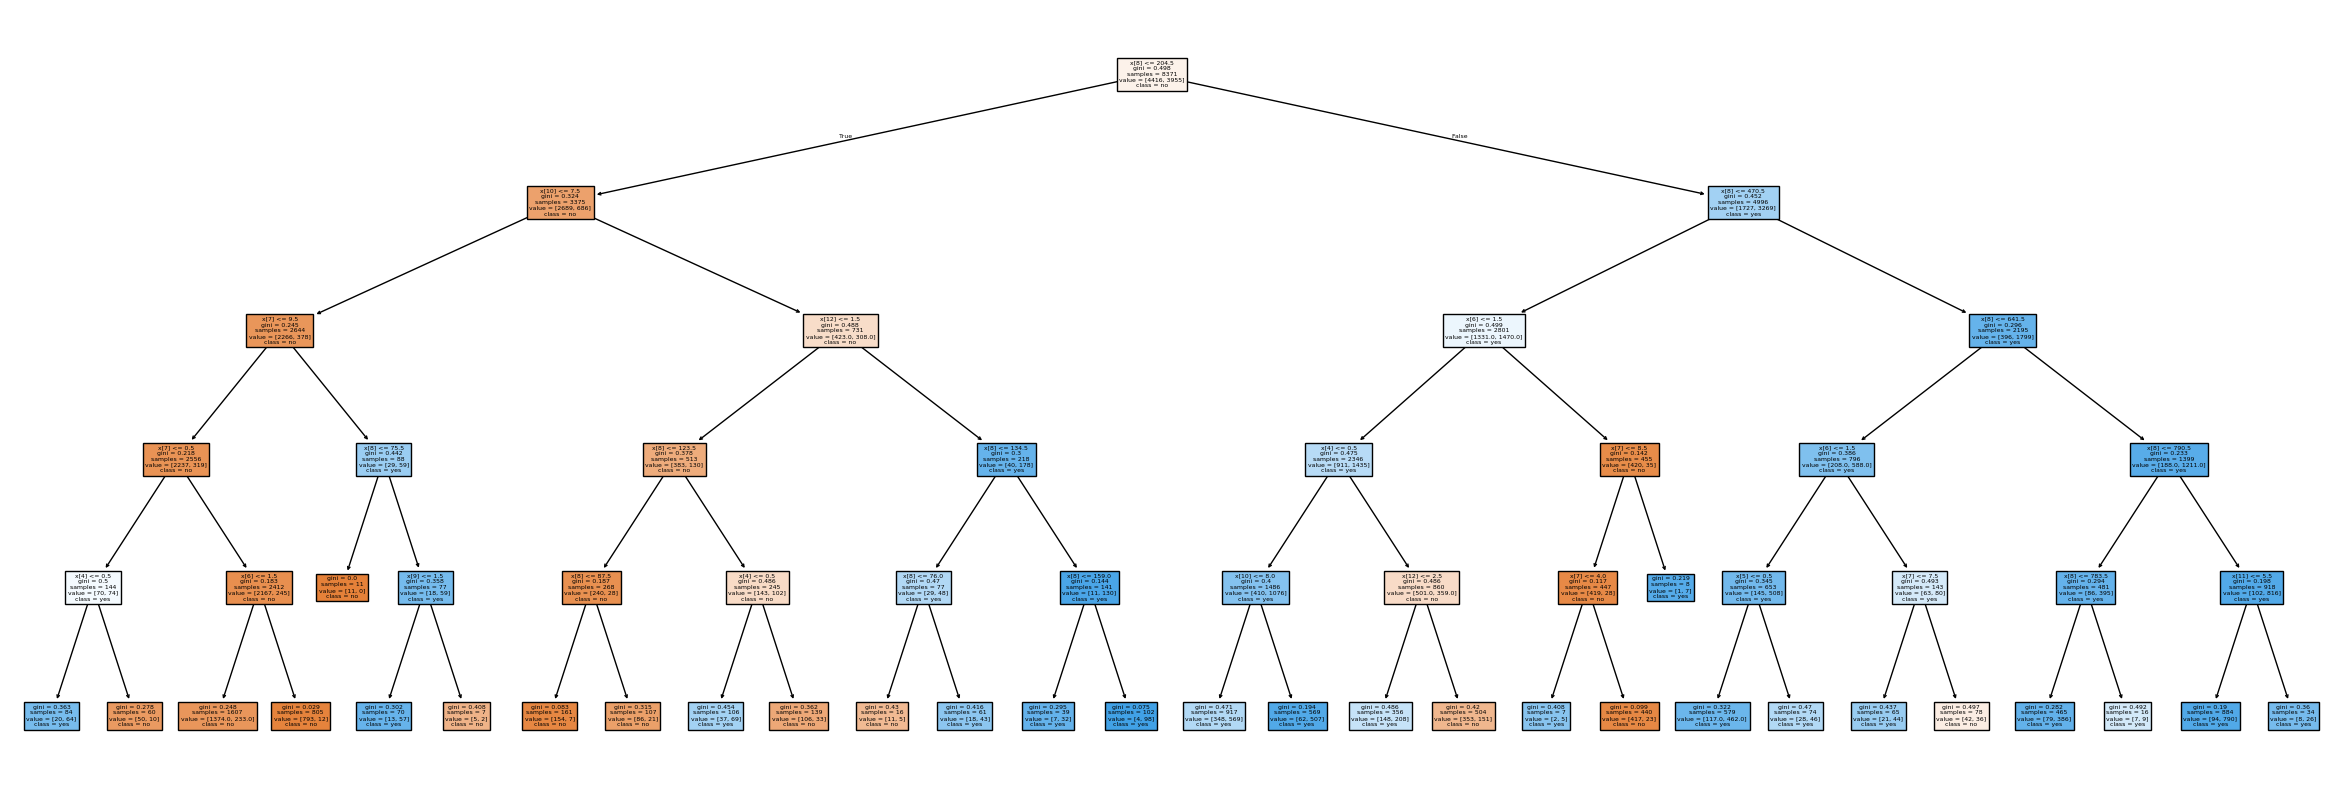

In [ ]:
plt.figure(figsize=(30,10))
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [ ]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [ ]:
mscore(dt1)

Training Score: 0.7850913869310716
Testing Score: 0.7724829810103906


In [ ]:
ypred_dt1=dt1.predict(x_test)

In [ ]:
eval_model(y_test,ypred_dt1)

Accuracy Score: 0.7724829810103906
Confusion Matrix:
 [[1138  319]
 [ 316 1018]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1457
           1       0.76      0.76      0.76      1334

    accuracy                           0.77      2791
   macro avg       0.77      0.77      0.77      2791
weighted avg       0.77      0.77      0.77      2791



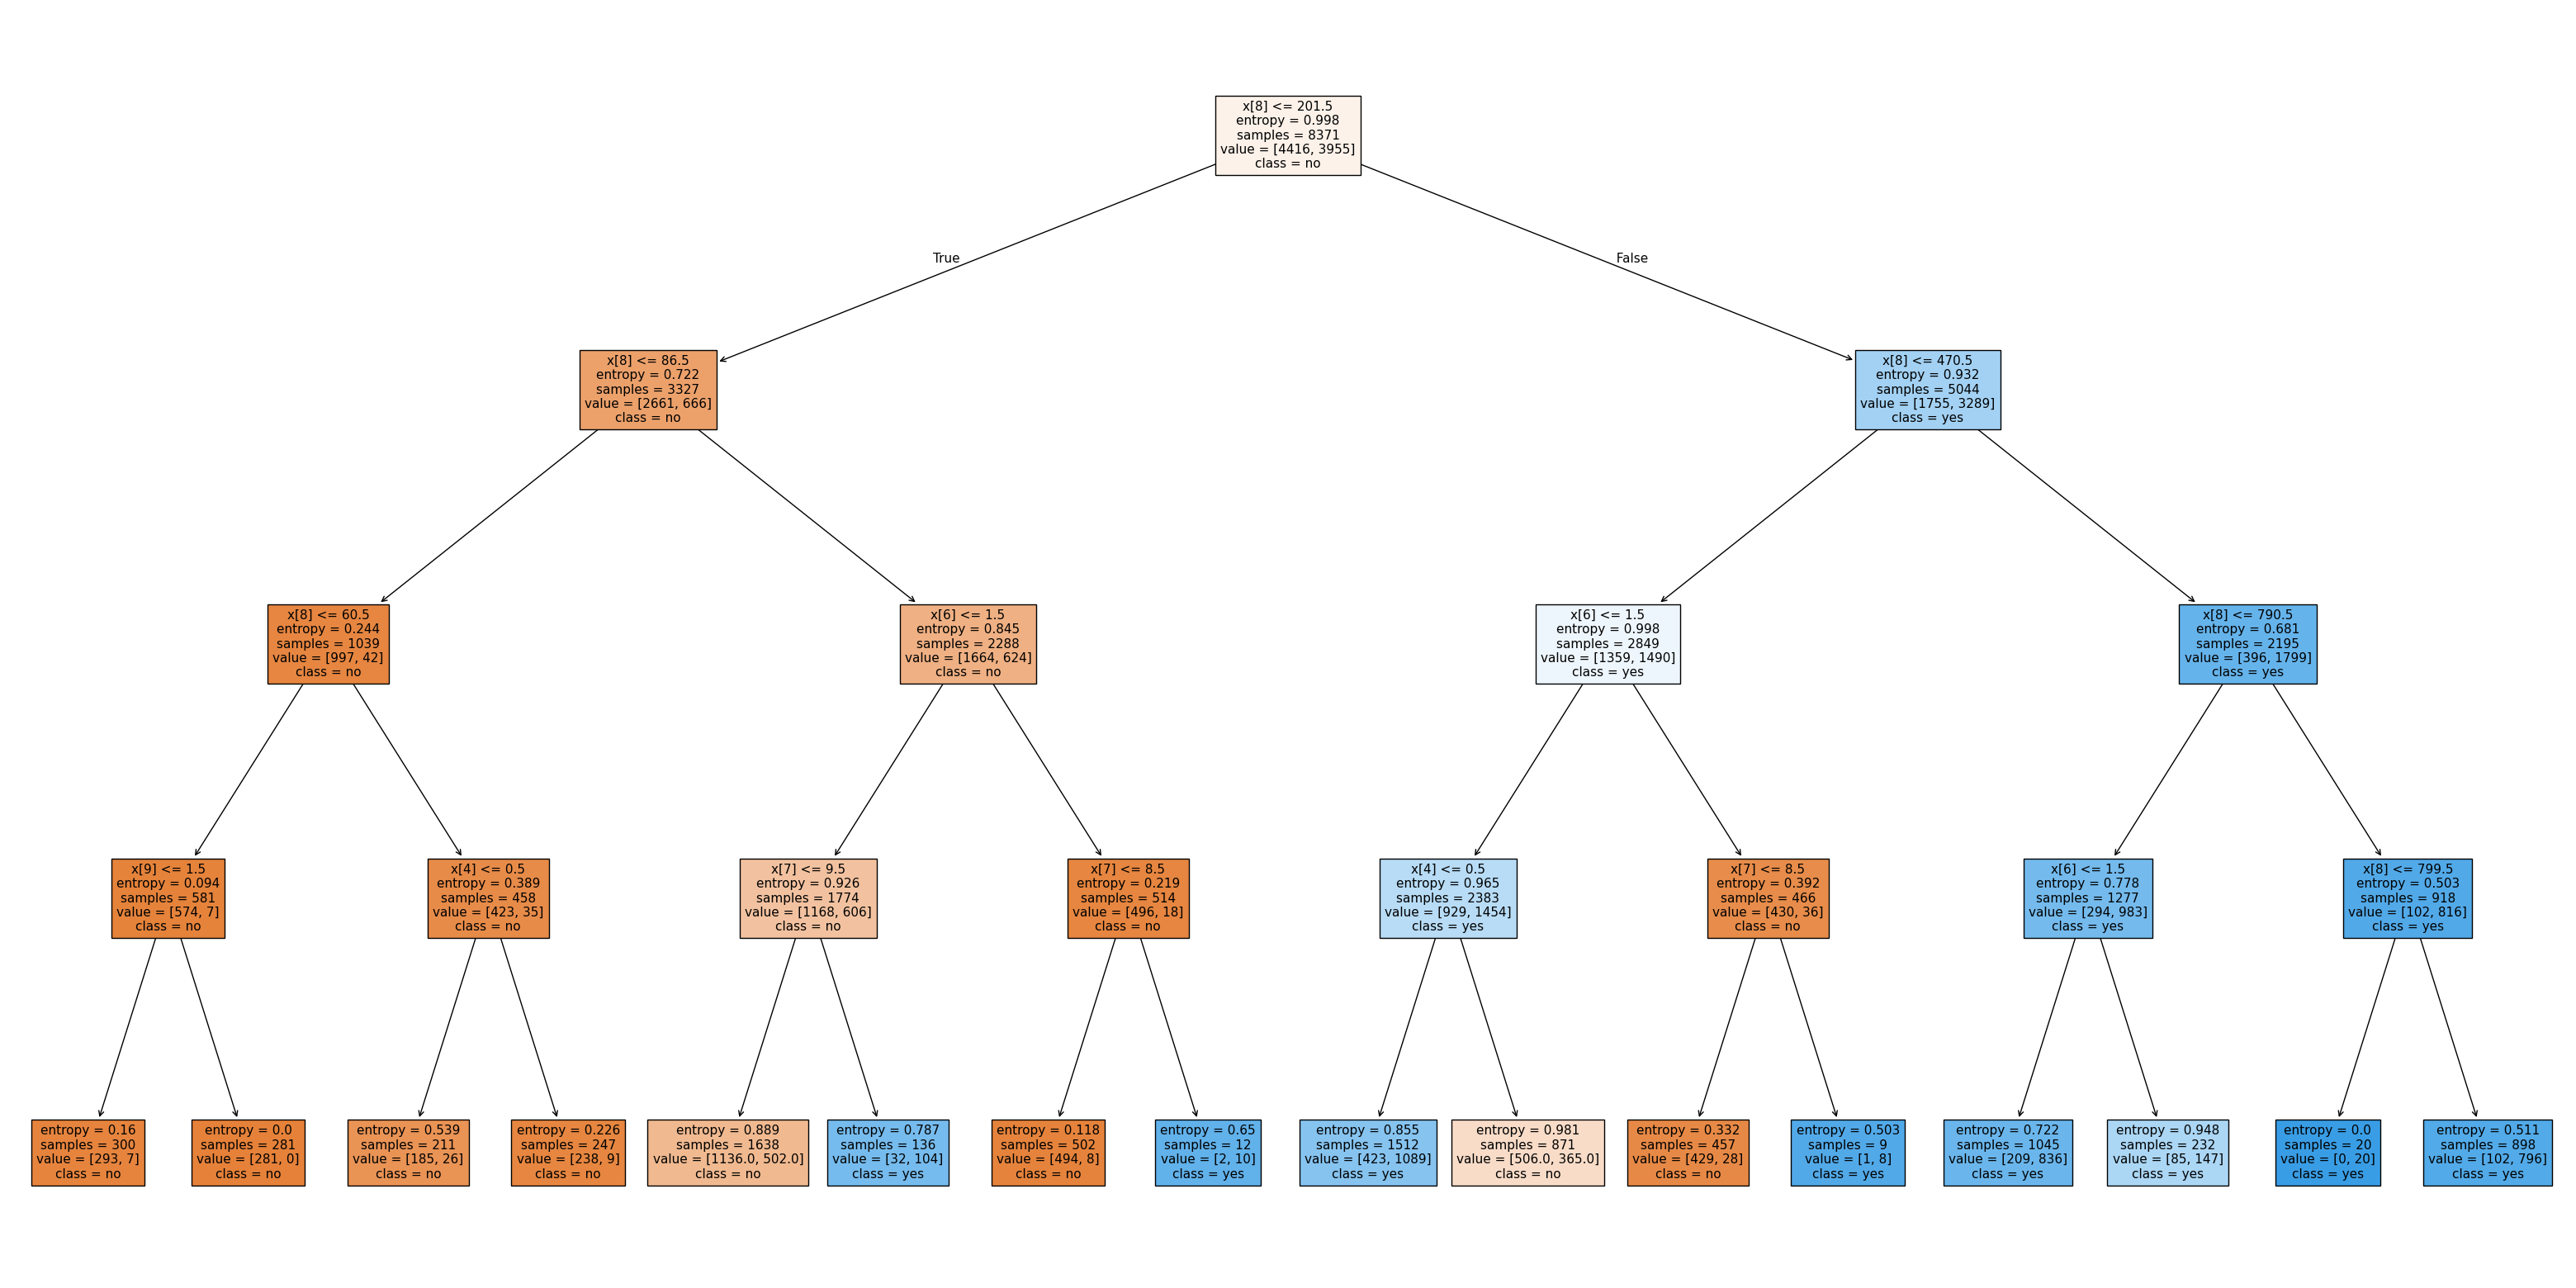

In [ ]:
plt.figure(figsize=(40,20))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()